# 패키지 설정 및 데이터 전처리

In [68]:
# 데이터조작 패키지
import numpy as np
import pandas as pd

# 시각화패키지
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import plotly.express as px

# warning 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 전처리 패키지
import sklearn.preprocessing as pc      

# 날짜 시간 패키지
from datetime import datetime, timedelta

In [69]:
# 한글 폰트 적용을 위한 코드
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [70]:
# 열과 행 생략없이 보기 위한 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [71]:
# 드라이브에 업로드 된 파일 경로를 읽어오기 위한 코드
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
base_dir = '/content/gdrive/My Drive/Colab Notebooks/latest/MES_csv/'

In [73]:
# MES 테이블 데이터 로딩 - 불량 분석 관련 데이터만 로딩
daily_fault = pd.read_csv(base_dir+'daily_fault.csv')
material = pd.read_csv(base_dir+'material.csv')
moldlot = pd.read_csv(base_dir+'moldlot.csv')
prd_color = pd.read_csv(base_dir+'prd_color.csv')
prt = pd.read_csv(base_dir+'print.csv')
prt_std_value = pd.read_csv(base_dir+'prt_std_value.csv')
treat = pd.read_csv(base_dir+'treat.csv')

In [74]:
# 불필요한 컬럼 드랍 + 필수데이터 결측된 행 드랍
material.drop(columns=['자재입고_cd_no', '자재입고_이름', '자재입고_수량', '자재입고_잔량', 'del_yn'], axis='columns', inplace=True)
material.dropna(axis='rows', inplace=True)
material.reset_index(inplace=True, drop=True)

moldlot.drop(columns=['샌드_잔량', '샌드_여부', 'ml_blk', 'blk_reason', 'blk_id', 'blk_dttm', 'del_yn'], axis='columns', inplace=True)
moldlot.dropna(subset=['투입로트', '입고로트', '샌드_건조기번호'], axis='rows', inplace=True)
moldlot.reset_index(inplace=True, drop=True)

prd_color.drop(columns=['컬러_바탕센터라인', '동판위치', '디자인_인쇄_순서'], axis='columns', inplace=True)
prd_color.dropna(subset=['상품코드', '컬러코드', '색상이름'], axis='rows', inplace=True)
prd_color.reset_index(inplace=True, drop=True)

prt.drop(columns=['인쇄_잔량', 'del_yn', '주문번호', '주문업체명', '인쇄_비고', '제품_타입', '렌즈타입', 'job_sch_no'], axis='columns', inplace=True)
prt.dropna(subset=['인쇄로트', '투입로트', '상품코드', '컬러코드'], axis='rows', inplace=True)
prt.reset_index(inplace=True, drop=True)

prt_std_value.drop(columns=['자재입고_cd_no', '비고'], axis='columns', inplace=True)
# prt_std_value.drop(index=[288,461], axis='rows', inplace=True)
prt_std_value = prt_std_value[prt_std_value.인쇄_작업날짜 < 30000101]
prt_std_value.dropna(subset=['상품코드', '컬러코드', '인쇄기계번호', '인쇄_작업날짜'], axis='rows', inplace=True)
prt_std_value.reset_index(inplace=True, drop=True)

treat.drop(columns=['멸균로트', '일반도수', '난시도수', '난시_축', '생산_수량차', 'thk_chk1', 'thk_chk2', 'thk_chk3', 'thk_chk4', 'thk_chk5', 'thk_chk6', 'thk_chk7', 'thk_chk8', 
                    'domestic', 'del_yn', '연마기계번호', '연마_불량', '연마_수량차', '연마_합격량', '연마_작업자', '연마_작업날짜', 'dgr_chk1', 'dgr_chk2', 'dgr_chk3', 'dgr_chk4', 
                    'dgr_chk5', 'dgr_chk6', 'dgr_chk7', 'dgr_chk8', 'dmt_chk1', 'dmt_chk2', 'dmt_chk3', 'dmt_chk4', 'dmt_chk5', 'dmt_chk6', 'dmt_chk7', 'dmt_chk8', 'cur_chk1', 
                    'cur_chk2', 'cur_chk3', 'cur_chk4', 'cur_chk4', 'cur_chk5', 'cur_chk6', 'cur_chk7', 'cur_chk8', '직경', '포장_수량차', '멸균_수량차', '품명', 'stg_rem_amt', 
                    'stg_wrk_id', 'stg_wrk_dt', 'lens_type', 'mold_type', 'p_job', 'emg_sample', 'div_abnormal', 'chk_lbl1', 'chk_lbl2', 'chk_lbl3', 'chk_lbl4', 'chk_lbl5', 
                    'chk_lbl6', 'chk_lbl7', 'chk_lbl8', 'chk_ext1', 'chk_ext2', 'chk_ext3', 'chk_ext4', 'chk_ext5', 'chk_ext6', 'chk_ext7', 'chk_ext8', 'chk_decision', 'remark', 
                    'div_rmk', 'trt2_rmk', 'ins_rmk', 'pkg_rmk', 'ste_rmk', 'chk_rmk', 'fc_mold_lot', '검사기계번호'], axis='columns', inplace=True)
treat.dropna(subset=['생산로트', '인쇄로트'], axis='rows', inplace=True)
treat.reset_index(inplace=True, drop=True)

In [75]:
# 컬럼 형변환
daily_fault['일일불량_날짜'] = daily_fault['일일불량_날짜'].astype('datetime64[ns]')

material['입고로트'] = material['입고로트'].astype(str) 
material['자재입고_등록날짜'] = material['자재입고_등록날짜'].astype('datetime64[ns]') 

moldlot['입고로트'] = moldlot['입고로트'].astype(str) 
moldlot['샌드_작업날짜'] = moldlot['샌드_작업날짜'].astype('datetime64[ns]') 

prd_color['동판제조일'] = prd_color['동판제조일'].astype('datetime64[ns]') 

prt['인쇄_작업날짜'] = prt['인쇄_작업날짜'].astype('datetime64[ns]') 

temp = []
for item in prt_std_value['인쇄_작업날짜']:
  item = str(item)
  temp.append(item[:4]+'-'+item[4:6]+'-'+item[6:])
prt_std_value['인쇄_작업날짜'] = pd.Series(temp).astype('datetime64[ns]') 

treat['성형로트'] = treat['성형로트'].astype(str)
treat['생산_작업날짜'] = treat['생산_작업날짜'].astype('datetime64[ns]')
treat['생산_등록날짜'] = treat['생산_등록날짜'].astype('datetime64[ns]')
treat['탈거_작업날짜'] = treat['탈거_작업날짜'].astype('datetime64[ns]')
treat['수화_작업날짜'] = treat['수화_작업날짜'].astype('datetime64[ns]')
treat['검사_작업날짜'] = treat['검사_작업날짜'].astype('datetime64[ns]')
treat['포장_작업날짜'] = treat['포장_작업날짜'].astype('datetime64[ns]')
treat['멸균_작업날짜'] = treat['멸균_작업날짜'].astype('datetime64[ns]')
treat['최종검사_작업날짜'] = treat['최종검사_작업날짜'].astype('datetime64[ns]')

In [76]:
# 각 테이블 함께 조회하기 위해 조인테이블 구성
mat_mold = pd.merge(material, moldlot, how='right', on=['입고로트'])

mat_mold_prt = pd.merge(mat_mold, prt, how='right', on=['투입로트'])

mat_mold_prt_trt = pd.merge(mat_mold_prt, treat, how='right', on=['인쇄로트'])

jointable = pd.merge(mat_mold_prt_trt, prt_std_value, how='left', on=['인쇄기계번호', '인쇄_작업날짜', '상품코드', '컬러코드'])

In [77]:
jointable = jointable.assign(파손불량확률 = lambda df: df['검사_파손불량']/df['수화_합격량'])\
.assign(흠집2불량확률 = lambda df: df['검사_흠집2불량']/df['수화_합격량'])\
.assign(인쇄불량확률 = lambda df: df['검사_인쇄불량']/df['수화_합격량'])\
.assign(번짐불량확률 = lambda df: df['검사_번짐불량']/df['수화_합격량'])\
.assign(실불량확률 = lambda df: df['검사_실불량']/df['수화_합격량'])\
.assign(총불량확률 = lambda df: df['검사_총불량']/df['수화_합격량'])

# 교반로트 - 성형중합체

#### 교반로트번호 -> 5대불량발생확률 + 총불량 확률 + 총불량 개수 + 총 검사량 표
* 교반로트번호로 Group by 수행, 같은 교반로트에서 발생한 불량의 합을 총 검사량 개수로 나누어 발생확률 계산


In [78]:
df = jointable.query('총불량확률 >= 0.3').groupby(['교반로트'])[['교반로트','파손불량확률', '흠집2불량확률', '인쇄불량확률', '번짐불량확률', '실불량확률', '총불량확률']].mean().sort_values(by='총불량확률', ascending=False)
df['총불량 개수'] = jointable.groupby(['교반로트'])['검사_총불량'].sum()
df['총 검사량'] = jointable.groupby(['교반로트'])['수화_합격량'].sum()
df

,파손불량확률,흠집2불량확률,인쇄불량확률,번짐불량확률,실불량확률,총불량확률,총불량 개수,총 검사량
교반로트,,,,,,,,
170728-1,0.032560,0.023978,0.004447,0.000000,0.005372,0.881986,11478,14801
200224-1,0.116956,0.035454,0.075767,0.484053,0.017647,0.867919,11015,13364
200213-1,0.057934,0.019827,0.023428,0.514594,0.020759,0.741230,3360,5363
2002241-1,0.118386,0.009865,0.046637,0.506726,0.016143,0.736323,821,1115
200828-1,0.042210,0.013790,0.449666,0.096463,0.013424,0.696627,11030,20984
1801001-1,0.224000,0.328000,0.005333,0.000000,0.029333,0.693333,260,375
200309-1,0.128869,0.052934,0.137982,0.000000,0.021973,0.680420,408,1157
200217-1,0.104801,0.030727,0.051281,0.344581,0.025879,0.661371,14199,25940
180613-1,0.058148,0.011111,0.002222,0.525926,0.001852,0.658519,1302,3964


#### 교반로트별 각 불량발생확률의 시계열 Lineplot
* 위에서 확인한 표 데이터를 시계열 데이터의 형태로 각 불량 발생 확률 선 그래프 시각화 (2018년 11월부터의 데이터)

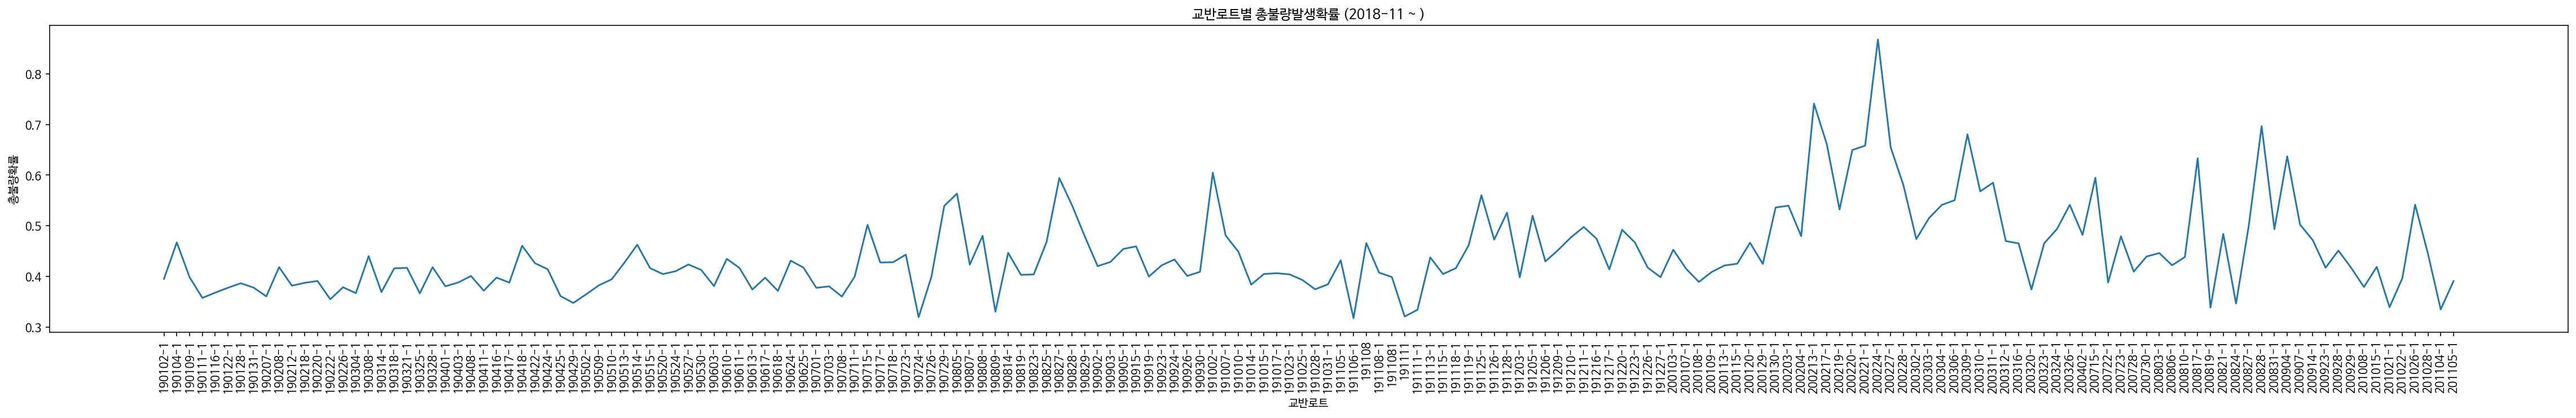

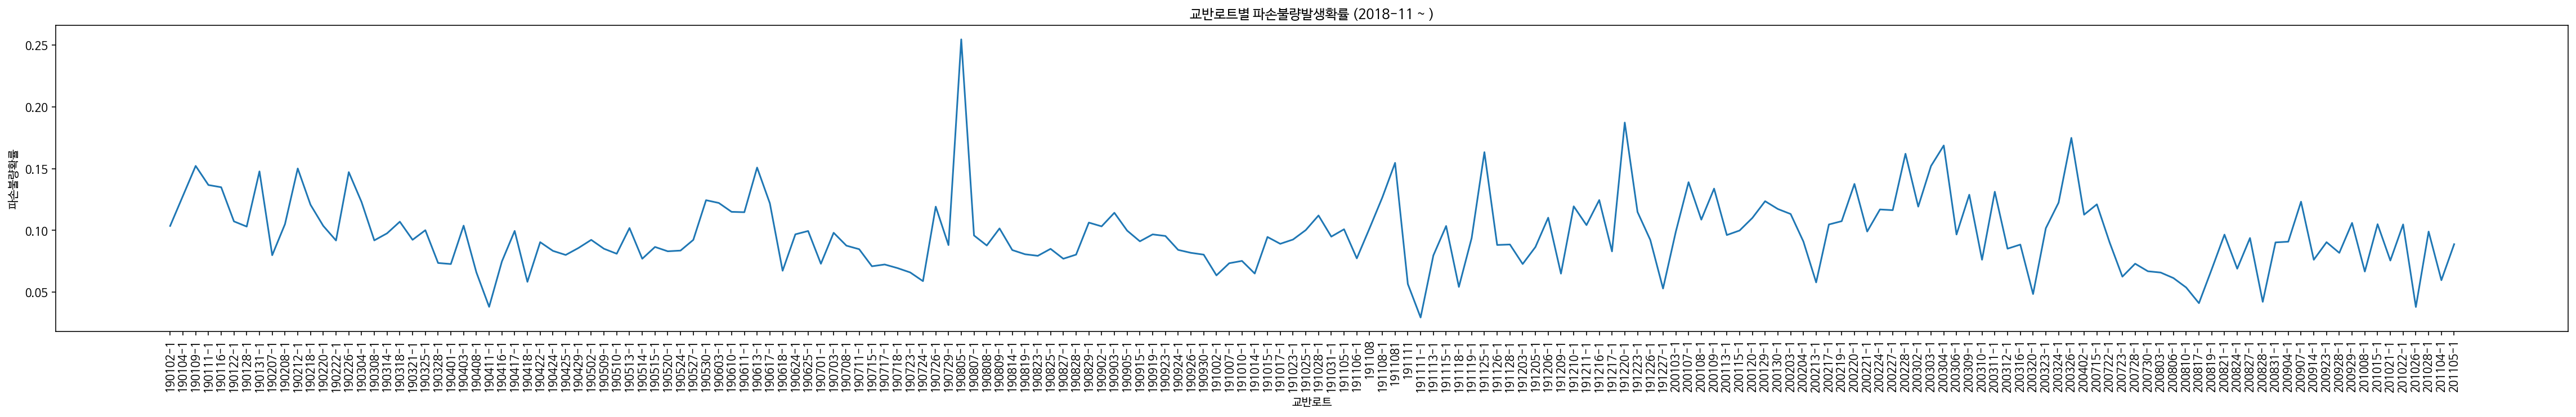

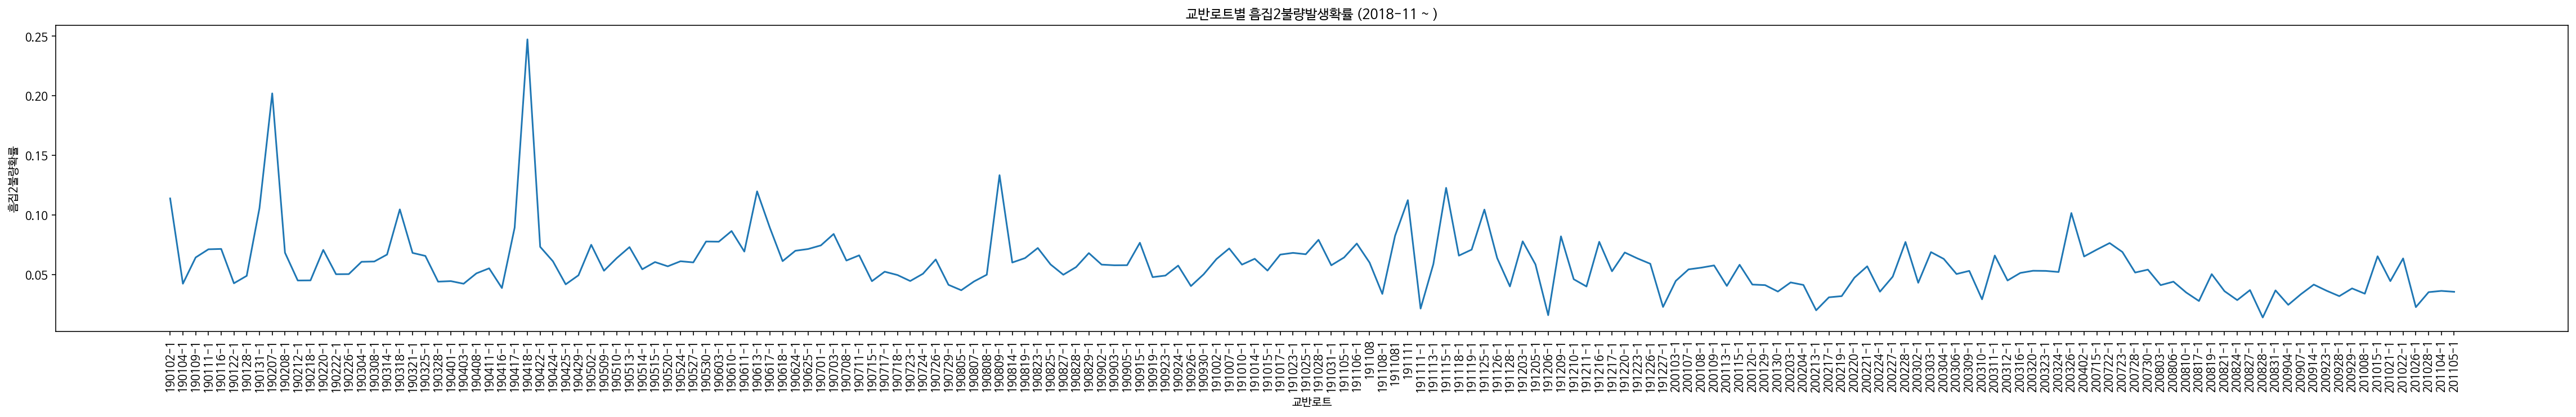

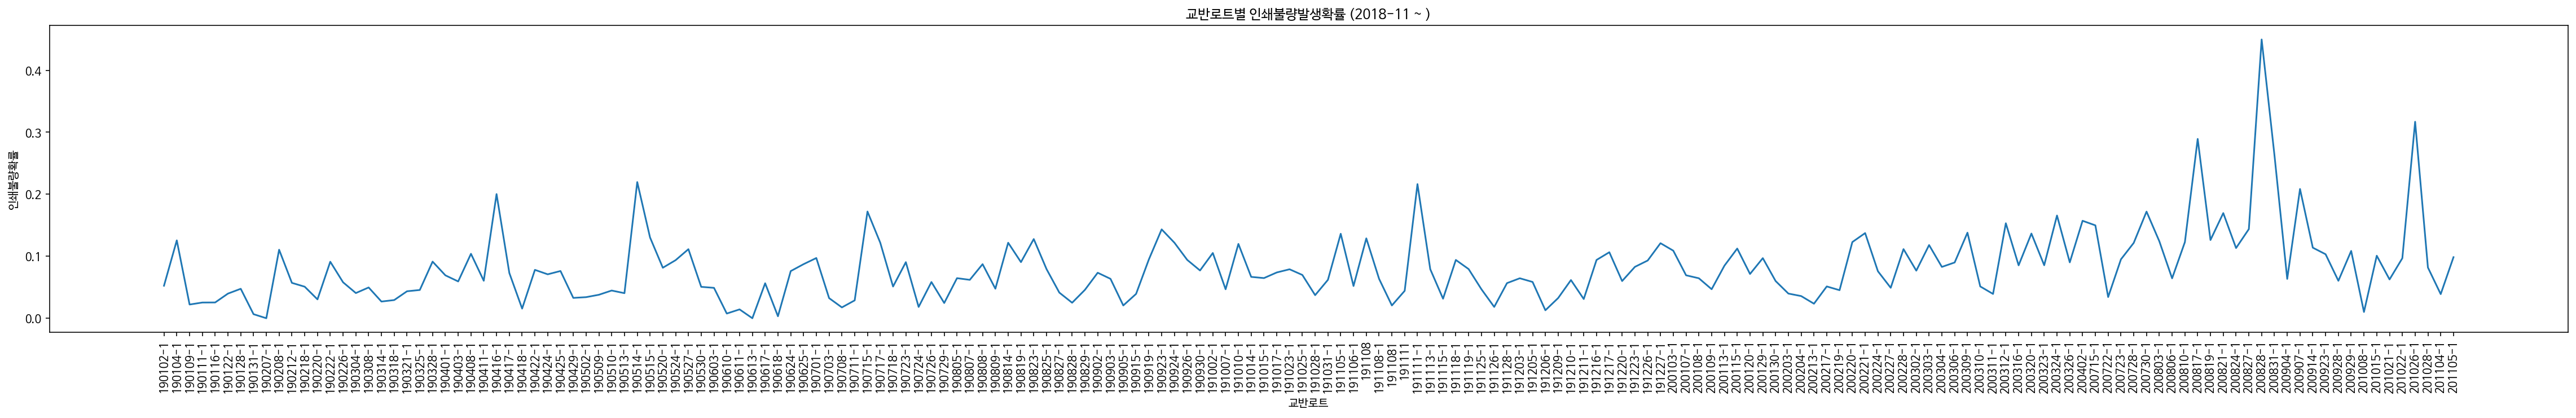

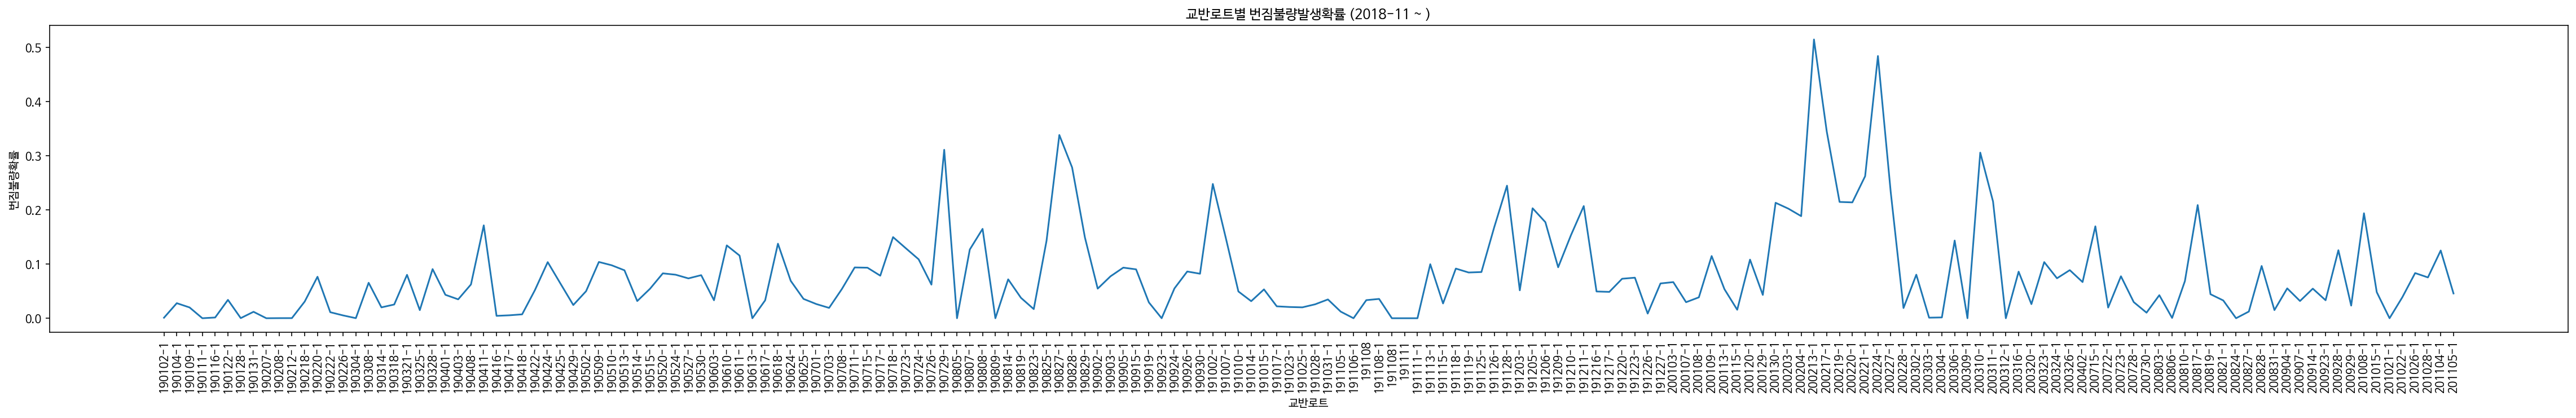

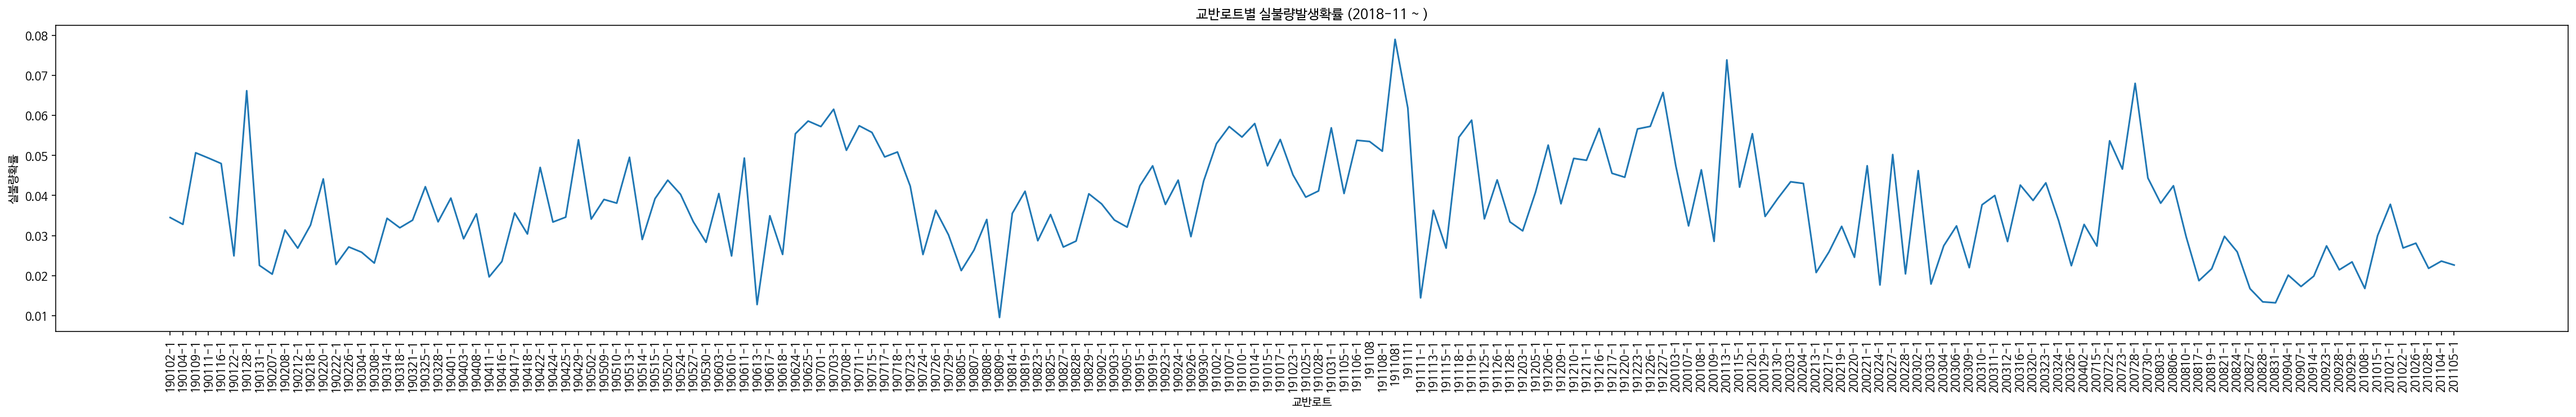

In [79]:
plt.figure(figsize=(40,5))
sns.lineplot(data=df[df.index.str.len() <= 8].query('교반로트 >= "190101-1"').sort_values(by='교반로트'), x='교반로트', y='총불량확률')
plt.title('교반로트별 총불량발생확률 (2018-11 ~ )')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(40,5))
sns.lineplot(data=df[df.index.str.len() <= 8].query('교반로트 >= "190101-1"').sort_values(by='교반로트'), x='교반로트', y='파손불량확률')
plt.title('교반로트별 파손불량발생확률 (2018-11 ~ )')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(40,5))
sns.lineplot(data=df[df.index.str.len() <= 8].query('교반로트 >= "190101-1"').sort_values(by='교반로트'), x='교반로트', y='흠집2불량확률')
plt.title('교반로트별 흠집2불량발생확률 (2018-11 ~ )')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(40,5))
sns.lineplot(data=df[df.index.str.len() <= 8].query('교반로트 >= "190101-1"').sort_values(by='교반로트'), x='교반로트', y='인쇄불량확률')
plt.title('교반로트별 인쇄불량발생확률 (2018-11 ~ )')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(40,5))
sns.lineplot(data=df[df.index.str.len() <= 8].query('교반로트 >= "190101-1"').sort_values(by='교반로트'), x='교반로트', y='번짐불량확률')
plt.title('교반로트별 번짐불량발생확률 (2018-11 ~ )')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(40,5))
sns.lineplot(data=df[df.index.str.len() <= 8].query('교반로트 >= "190101-1"').sort_values(by='교반로트'), x='교반로트', y='실불량확률')
plt.title('교반로트별 실불량발생확률 (2018-11 ~ )')
plt.xticks(rotation=90)
plt.show()

# 상품코드별 인쇄기 값

#### 상품코드 -> 5대불량발생확률 + 총불량확률 + 총검사개수 표
* 상품코드로 Group by 수행, 동일 상품코드에서 발생한 불량의 합계를 총 검사량으로 나눠서 불량이 발생할 확률 계산한 것
* 총검사개수가 5000개가 넘는 상품에 대해 각 불량 확률 중 하나라도 30% 를 넘는 경우 필터링

In [81]:
df = jointable.groupby(['상품코드'])[['상품코드', '파손불량확률', '흠집2불량확률', '인쇄불량확률', '번짐불량확률', '실불량확률', '총불량확률']].mean().sort_values(by='총불량확률', ascending=False)
df['총검사개수'] = jointable.groupby(['상품코드'])['수화_합격량'].sum()
prod_list = list(df.index)

df.query('총불량확률 >= 0.3 or 파손불량확률 >= 0.3 or 흠집2불량확률 >= 0.3 or 인쇄불량확률 >= 0.3 or 번짐불량확률 >= 0.3 or 실불량확률 >= 0.3').query('총검사개수 >= 5000')

,파손불량확률,흠집2불량확률,인쇄불량확률,번짐불량확률,실불량확률,총불량확률,총검사개수
상품코드,,,,,,,
F168,0.044593,0.026171,0.439482,0.000000,0.007457,0.606375,11773
K2015,0.076398,0.038324,0.050625,0.188637,0.021686,0.459802,27498
A3053-A,0.087309,0.112989,0.061494,0.024450,0.067740,0.451658,5821
K3024,0.070938,0.036790,0.015481,0.192244,0.029004,0.408863,15053
BLU101,0.076893,0.047978,0.092133,0.061646,0.033615,0.408696,54880
A3056,0.108578,0.063776,0.023681,0.082483,0.044634,0.407277,95558
A2062,0.080011,0.082659,0.032320,0.046854,0.066213,0.405216,21100
F36-2,0.054567,0.038561,0.023469,0.212299,0.015127,0.404994,7181
F167,0.074102,0.020525,0.156599,0.033933,0.024971,0.404984,12439


#### 상품코드별 인쇄기 설정값 경우의 수에 따른 불량 발생 확률 표
* 각 상품별 인쇄기 설정값을 경우의 수대로 Group by 수행, 그룹의 불량을 합하여 총 검사량으로 나눠 발생확률을 계산
* 인쇄압력, 동판압력, 패드경도가 모두 누락된 경우는 Drop
* 총불량확률이 30%가 넘는 데이터 필터링

In [82]:
# 위에서 필터링한 상품코드의 데이터를 원본 데이터 형태로 가져오기 위한 코드
prod_df = pd.DataFrame()
for prod_name in prod_list:
  prod_df = pd.concat([prod_df,jointable.query('상품코드 == "'+prod_name+'"')])

In [83]:
temp = prod_df.dropna(subset=['인쇄_압력','동판_압력','패드_경도'], how='all').query('총불량확률 >= 0.3').groupby(by=['상품코드','인쇄_압력','동판_압력','패드_경도'])[['상품코드','파손불량확률','흠집2불량확률','인쇄불량확률','번짐불량확률','실불량확률','총불량확률']].mean()
temp['총불량 개수'] = prod_df.dropna(subset=['인쇄_압력','동판_압력','패드_경도'], how='all').query('총불량확률 >= 0.3').groupby(by=['상품코드','인쇄_압력','동판_압력','패드_경도'])['검사_총불량'].sum()
temp['총 검사량'] = prod_df.dropna(subset=['인쇄_압력','동판_압력','패드_경도'], how='all').query('총불량확률 >= 0.3').groupby(by=['상품코드','인쇄_압력','동판_압력','패드_경도'])['수화_합격량'].sum()
temp

파손불량확률   흠집2불량확률    인쇄불량확률    번짐불량확률     실불량확률  \
상품코드    인쇄_압력  동판_압력  패드_경도                                                     
A1013   3.00   3.10   25.0   0.028759  0.023218  0.111128  0.556136  0.019773   
        3.50   3.70   29.0   0.057394  0.074949  0.091155  0.108035  0.041864   
A1014   3.70   3.40   29.0   0.079125  0.028620  0.017677  0.103535  0.031145   
        3.80   4.90   29.0   0.091674  0.021852  0.020271  0.263947  0.035477   
        96.00  184.00 29.0   0.118582  0.097096  0.020661  0.000000  0.009489   
A1015   3.60   3.50   29.0   0.055602  0.018545  0.028585  0.291124  0.089056   
        4.40   2.80   29.0   0.084333  0.042277  0.000000  0.072848  0.020429   
A2007   3.90   3.40   29.0   0.112805  0.059959  0.019309  0.000000  0.022358   
A2031-A 2.90   5.20   29.0   0.073585  0.061631  0.000000  0.345947  0.025575   
        3.70   4.10   29.0   0.076212  0.015698  0.022314  0.216586  0.042308   
        4.20   4.50   29.0   0.026917  0.009478  0.632321  0.028340  0.010773   
A2051   3.90   5.10   29.0   0.112906  0.033136  0.069658  0.269964  0.044836   
        4.30   3.70   29.0   0.076462  0.029868  0.042312  0.017341  0.087943   
        4.80   4.70   29.0   0.058195  0.045077  0.064628  0.265738  0.054441   
A2052   3.90   3.40   29.0   0.188810  0.058529  0.070246  0.049978  0.045407   
        4.00   3.60   29.0   0.067750  0.072166  0.102324  0.107630  0.031426   
               4.90   29.0   0.081847  0.037010  0.052686  0.113533  0.049605   
        4.40   4.50   29.0   0.043186  0.017312  0.260723  0.273338  0.018041   
        4.70   4.00   29.0   0.000000  0.000000  1.000000  0.000000  0.000000   
        40.00  49.00  29.0   0.051362  0.023614  0.016152  0.436892  0.026343   
A2053   3.90   3.60   29.0   0.027076  0.016018  0.000000  0.811164  0.021320   
        98.40  5.50   29.0   0.090439  0.036580  0.026954  0.207607  0.026160   
A2054   3.80   3.70   29.0   0.148341  0.021958  0.050084  0.039479  0.023240   
        4.10   5.90   29.0   0.087556  0.041813  0.217726  0.000000  0.023763   
A2055   3.80   5.10   29.0   0.049766  0.041433  0.123617  0.130475  0.039042   
A2059   3.60   3.70   29.0   0.073239  0.059155  0.025352  0.129577  0.078873   
        3.70   4.10   29.0   0.103853  0.052109  0.020422  0.038863  0.078671   
        3.90   4.10   29.0   0.108954  0.044479  0.004550  0.211286  0.061180   
        4.10   4.90   29.0   0.136716  0.035224  0.013433  0.020896  0.017413   
A2060   98.40  5.50   29.0   0.097972  0.056286  0.011656  0.043452  0.027980   
A2061   3.50   3.70   29.0   0.074718  0.070708  0.057121  0.078265  0.037037   
        3.90   4.90   29.0   0.038375  0.042997  0.056349  0.268441  0.201120   
        4.10   4.80   29.0   0.038062  0.079585  0.062284  0.000000  0.017301   
        4.70   4.30   29.0   0.072401  0.089603  0.222859  0.001606  0.037564   
A2063   4.70   4.50   29.0   0.119668  0.094185  0.042612  0.109426  0.048390   
        4.80   4.60   29.0   0.079484  0.039966  0.222233  0.079135  0.070711   
A2064   4.00   4.90   29.0   0.121997  0.097055  0.098399  0.008219  0.074684   
        4.10   4.80   29.0   0.050779  0.072833  0.072988  0.000000  0.156124   
               4.90   29.0   0.121138  0.085994  0.233794  0.047762  0.074781   
A3010   4.30   2.90   29.0   0.123719  0.064529  0.031759  0.009322  0.047202   
A3034   4.00   4.80   29.0   0.092162  0.056753  0.155795  0.335643  0.054249   
A3035   4.90   5.10   29.0   0.084482  0.043522  0.002500  0.140411  0.020685   
A3037   4.60   4.60   29.0   0.159634  0.040808  0.005384  0.268533  0.033884   
        4.80   4.60   29.0   0.249208  0.065097  0.016071  0.017544  0.065758   
A3045   4.00   3.50   29.0   0.090990  0.056182  0.140754  0.286213  0.012088   
        4.10   5.20   29.0   0.077917  0.039203  0.038761  0.225706  0.027679   
        4.30   3.50   29.0   0.094083  0.046301  0.077403  0.272779  0.044062   
               3.60   29.0   0.127976  0.021429  0.118452  0.0

#### 위 표 데이터의 인쇄기 설정값을 자세하게 조회
* 인쇄기계 P03은 설정값의 포맷이 다르므로 제외
* 양질의 데이터가 20년 9월 이후부터 쌓였으므로 해당 시점 이후만 조회
* 인쇄압력, 동판압력, 패드경도가 모두 결측된 데이터는 Drop

In [21]:
prod_df.query("인쇄기계번호 != 'P03' and 인쇄_작업날짜 >= '2020-09-01'")[['상품코드','인쇄_대기','건조_대기','인쇄_압력','동판_압력','패드_경도','에어노즐1','에어노즐2','에어노즐3','에어노즐4','검사_파손불량','검사_흠집2불량','검사_인쇄불량','검사_번짐불량','검사_실불량','검사_총불량']].dropna(subset=['인쇄_압력','동판_압력','패드_경도'], how='all')

,상품코드,인쇄_대기,건조_대기,인쇄_압력,동판_압력,패드_경도,에어노즐1,에어노즐2,에어노즐3,에어노즐4,검사_파손불량,검사_흠집2불량,검사_인쇄불량,검사_번짐불량,검사_실불량,검사_총불량
36082,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,51,29,42,0,17,183
36083,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,3,5,6,0,4,24
36084,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,3,3,6,0,2,16
36085,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,5,3,6,0,3,22
36086,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,3,2,10,0,0,18
36087,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,4,3,6,0,1,15
36088,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,2,4,16,0,0,22
36089,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,8,0,0,0,0,27
36090,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,16,2,11,0,3,35
36091,A2056,3.2,3.4,3.6,4.8,NaN,0.0,0.0,4.0,4.0,13,10,23,0,2,58


# 패드

#### 패드 고유번호 -> 5대불량확률 + 총불량확률 + 총불량개수 + 총검사량(=수화_합격량)
* 각 패드별로 결측된 row 제외 패드번호를 인덱스로 Group by & 그룹의 수치 데이터를 합연산
* 그룹으로 묶인 4개의 DataFrame을 1개의 DataFrame으로 합침
* 합쳐진 DataFrame에서 패드번호를 기준으로 다시 한번 그룹핑(각 고유번호가 유니크하게), 수치데이터 합연산, 총불량확률 내림차순으로 정령
* 각 불량의 합을 총 검사량으로 나누어 불량의 발생확률 계산
* 검사량이 5000개 이상 && 총불량확률이 30% 이상 && 패드번호가 숫자형태 -> 표 확인

In [31]:
df1 = jointable.dropna(subset=['패드1']).groupby(by='패드1').sum()
df2 = jointable.dropna(subset=['패드2']).groupby(by='패드2').sum()
df3 = jointable.dropna(subset=['패드3']).groupby(by='패드3').sum()
df4 = jointable.dropna(subset=['패드4']).groupby(by='패드4').sum()

df = df1.append(df2).append(df3).append(df4)
view = df.groupby(by=df.index).sum().sort_values(by='총불량확률', ascending=False)
view.index.names = ['패드번호']
view['파손불량확률'] = view['검사_파손불량']/view['수화_합격량']
view['흠집2불량확률'] = view['검사_흠집2불량']/view['수화_합격량']
view['인쇄불량확률'] = view['검사_인쇄불량']/view['수화_합격량']
view['번짐불량확률'] = view['검사_번짐불량']/view['수화_합격량']
view['실불량확률'] = view['검사_실불량']/view['수화_합격량']
view['총불량확률'] = view['검사_총불량']/view['수화_합격량']

view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"')[['파손불량확률','흠집2불량확률','인쇄불량확률','번짐불량확률','실불량확률','총불량확률','검사_총불량','수화_합격량']].sort_values(by='총불량확률', ascending=False)

,파손불량확률,흠집2불량확률,인쇄불량확률,번짐불량확률,실불량확률,총불량확률,검사_총불량,수화_합격량
패드번호,,,,,,,,
59,0.118607,0.026327,0.042369,0.230632,0.019882,0.644316,4699,7293
83,0.056838,0.042451,0.095560,0.368561,0.025044,0.641918,3614,5630
63,0.097446,0.048691,0.085128,0.130659,0.022120,0.488972,7582,15506
36,0.138678,0.031366,0.027137,0.030132,0.021850,0.486872,2763,5675
39,0.069410,0.045117,0.072881,0.188523,0.042266,0.484755,3911,8068
47,0.098739,0.059384,0.075350,0.126050,0.020308,0.477451,3409,7140
15,0.068593,0.030299,0.181793,0.115865,0.023285,0.470753,3356,7129
13,0.091503,0.040266,0.087418,0.116363,0.029762,0.448646,3844,8568
56,0.085038,0.047537,0.096477,0.083041,0.021907,0.448281,8308,18533


#### 위 표 데이터의 불량 종류별 내림차순 막대 그래프

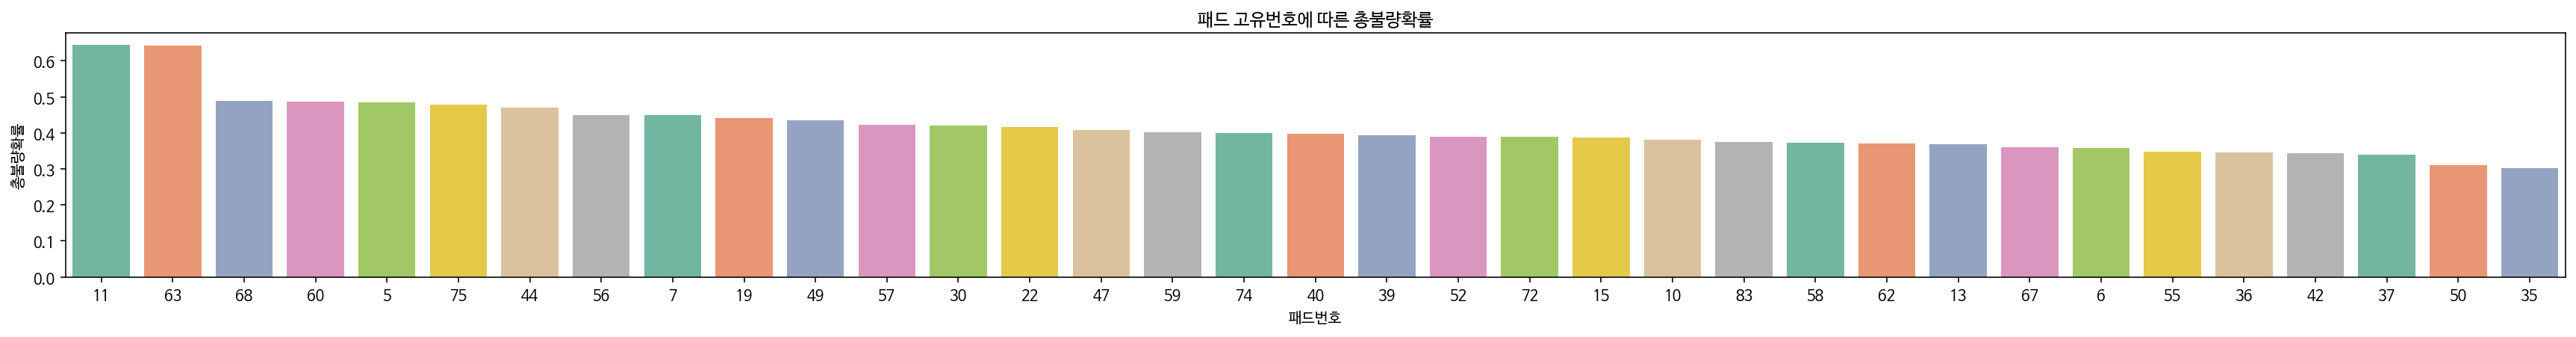

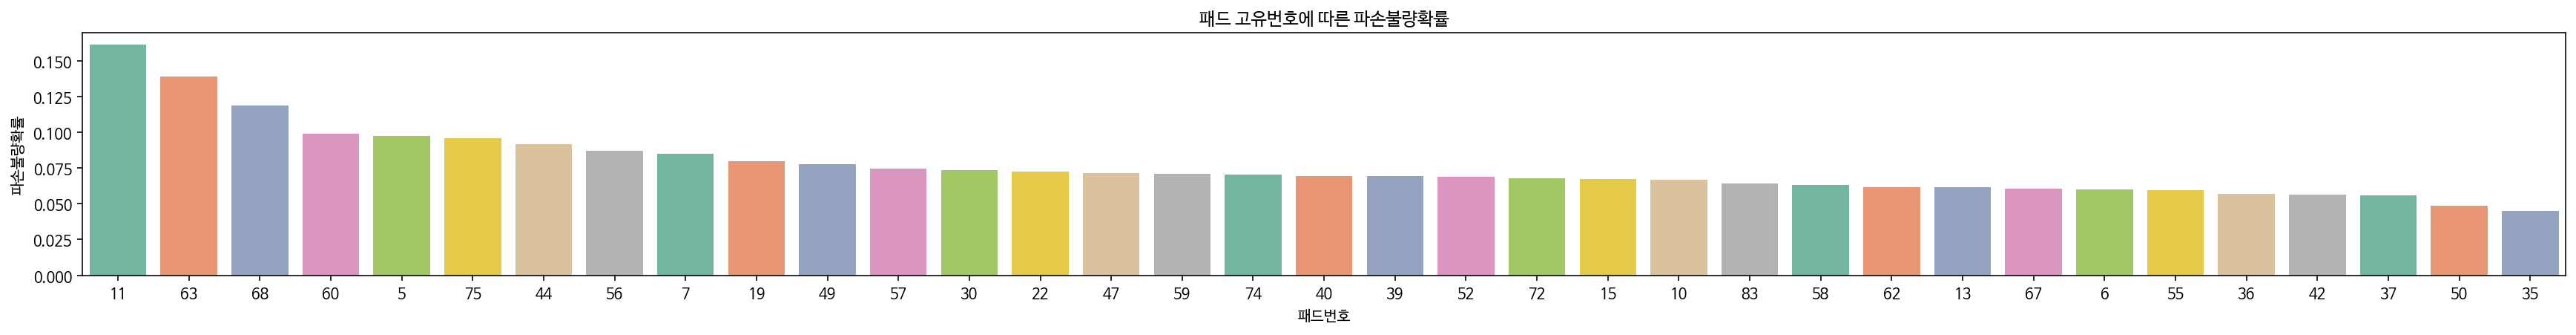

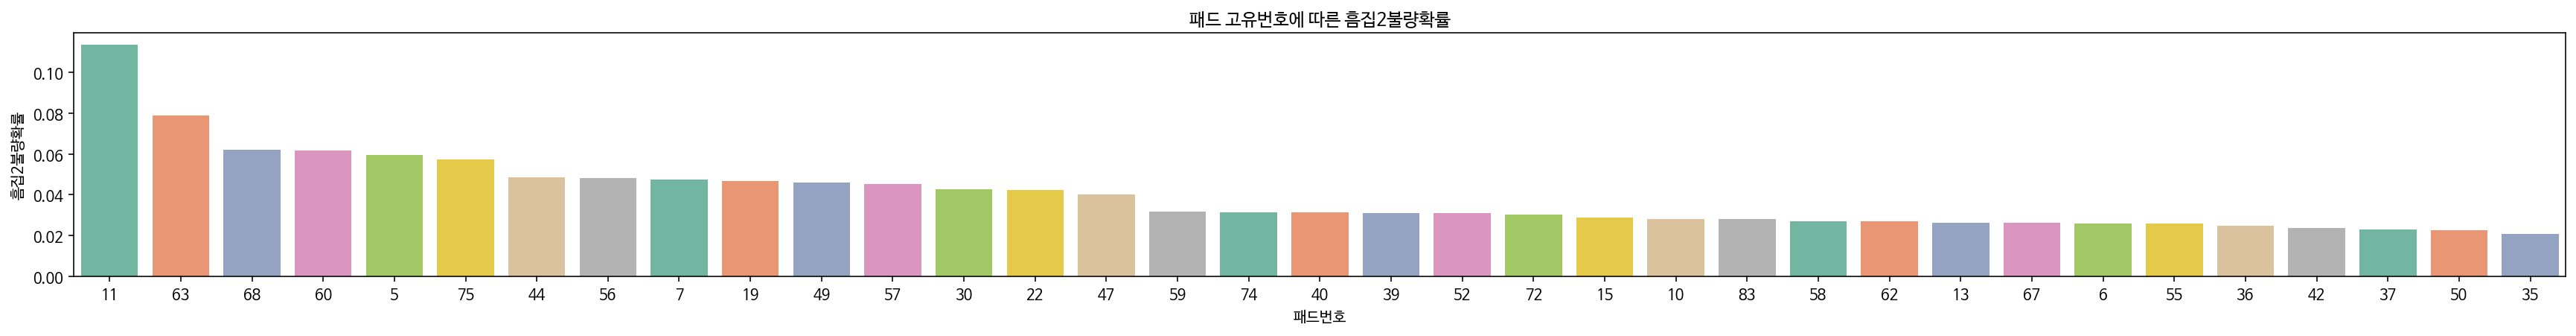

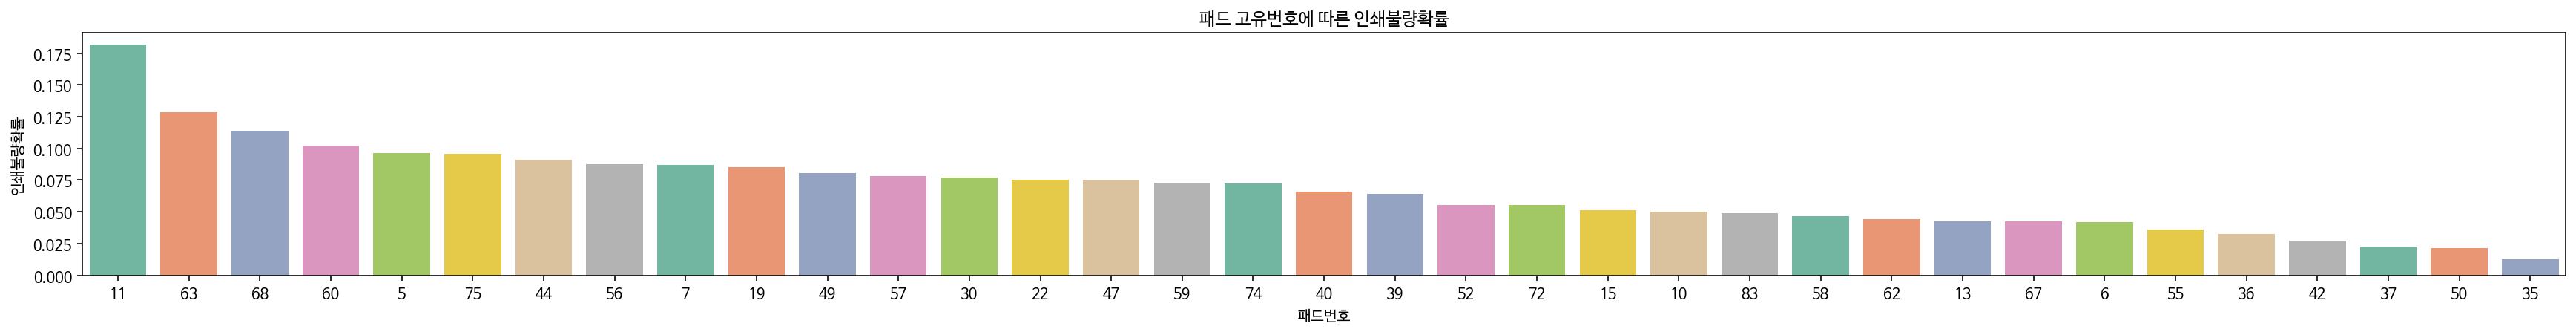

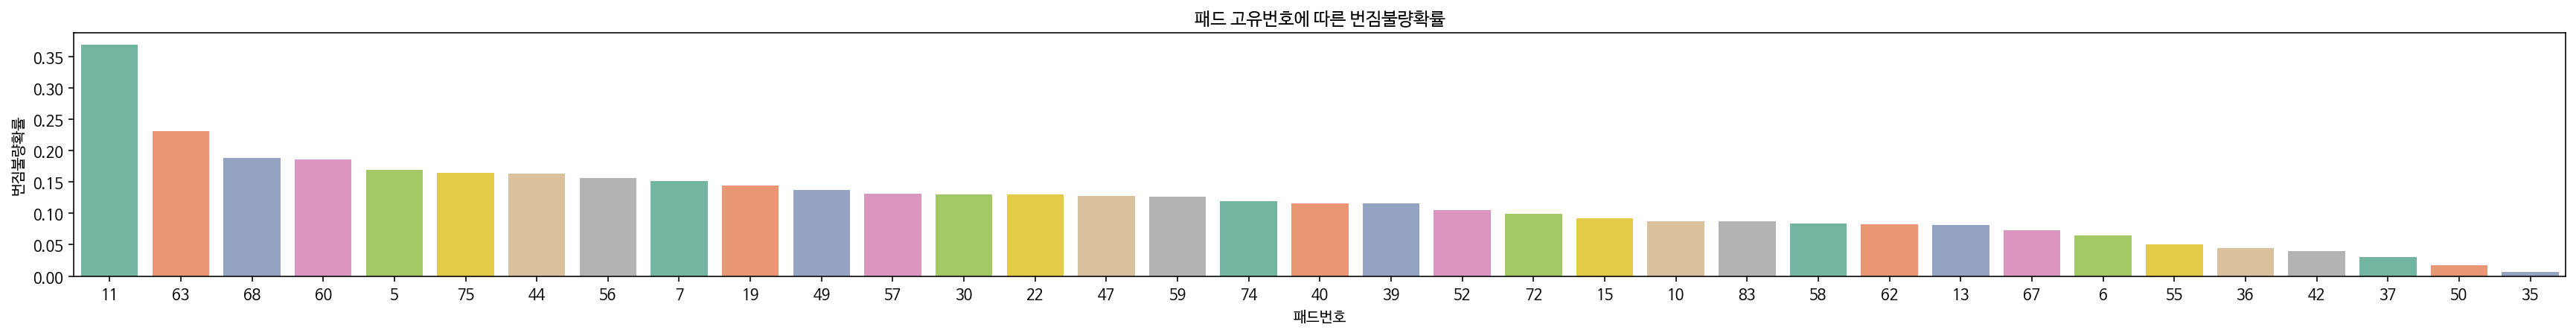

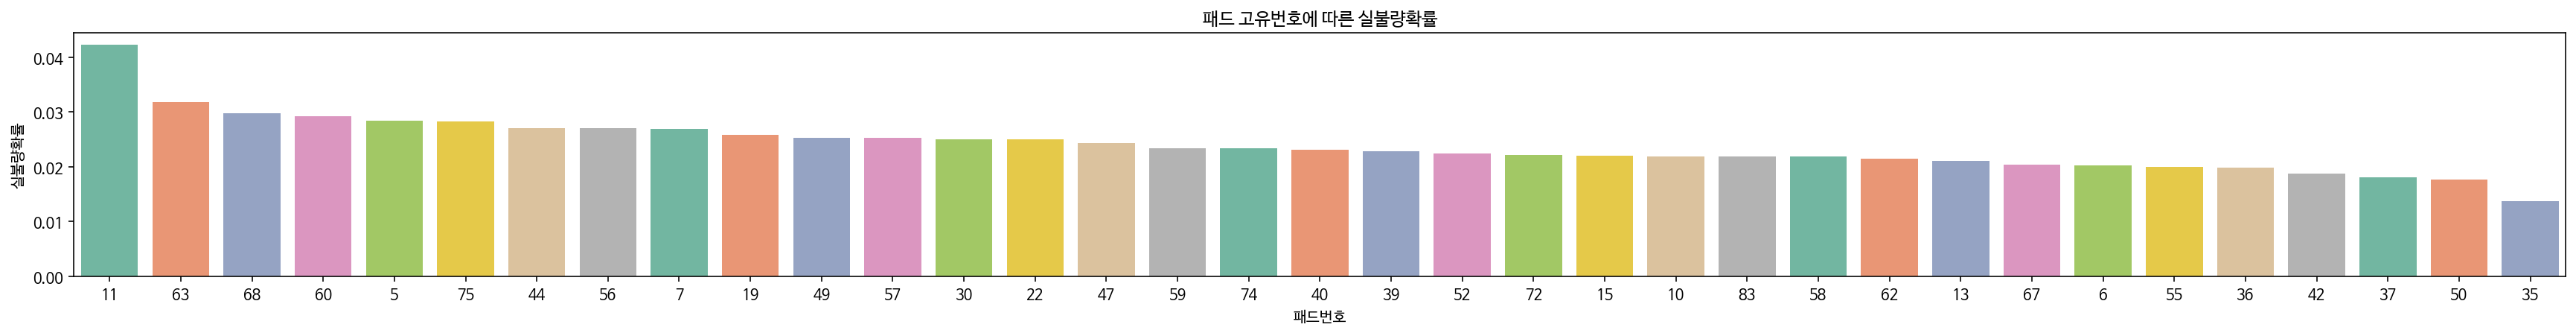

In [66]:
plt.figure(figsize=(30,3))
sns.barplot(data=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').sort_values(by='총불량확률', ascending=False), 
            x=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').index, y='총불량확률', palette=sns.color_palette('Set2'))
plt.title('패드 고유번호에 따른 총불량확률')
plt.show()

plt.figure(figsize=(30,3))
sns.barplot(data=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').sort_values(by='파손불량확률', ascending=False), 
            x=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').index, y='파손불량확률', palette=sns.color_palette('Set2'))
plt.title('패드 고유번호에 따른 파손불량확률')
plt.show()

plt.figure(figsize=(30,3))
sns.barplot(data=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').sort_values(by='흠집2불량확률', ascending=False), 
            x=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').index, y='흠집2불량확률', palette=sns.color_palette('Set2'))
plt.title('패드 고유번호에 따른 흠집2불량확률')
plt.show()

plt.figure(figsize=(30,3))
sns.barplot(data=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').sort_values(by='인쇄불량확률', ascending=False), 
            x=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').index, y='인쇄불량확률', palette=sns.color_palette('Set2'))
plt.title('패드 고유번호에 따른 인쇄불량확률')
plt.show()

plt.figure(figsize=(30,3))
sns.barplot(data=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').sort_values(by='번짐불량확률', ascending=False), 
            x=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').index, y='번짐불량확률', palette=sns.color_palette('Set2'))
plt.title('패드 고유번호에 따른 번짐불량확률')
plt.show()

plt.figure(figsize=(30,3))
sns.barplot(data=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').sort_values(by='실불량확률', ascending=False), 
            x=view.query('총불량확률 >= 0.3 and 수화_합격량 >= 5000 and 패드번호 != "A" and 패드번호 != "B"').index, y='실불량확률', palette=sns.color_palette('Set2'))
plt.title('패드 고유번호에 따른 실불량확률')
plt.show()

#### 4개의 패드컬럼으로 Group by -> 패드 조합에 따른 불량확률 확인
* 인쇄작업날짜 19년 11월부터의 데이터 && 총불량확률 30% 이상 데이터 필터링
* 그룹핑된 패드 조합, 해당 그룹의 평균 불량발생확률 확인

In [25]:
jointable.sort_values(by='총불량확률', ascending=False).query('인쇄_작업날짜 >= "2019-11-01" and 총불량확률 >= 0.3').groupby(by=['패드1','패드2','패드3','패드4'], dropna=False)[['파손불량확률','흠집2불량확률','인쇄불량확률','번짐불량확률','실불량확률','총불량확률']].mean()

파손불량확률   흠집2불량확률    인쇄불량확률    번짐불량확률     실불량확률     총불량확률
패드1 패드2 패드3 패드4                                                            
0   49  30  NaN  0.027076  0.016018  0.000000  0.811164  0.021320  1.000000
10  NaN 68  83   0.078815  0.067359  0.111797  0.326397  0.034816  0.694736
11  40  51  NaN  0.056983  0.043575  0.052514  0.505028  0.051397  0.763128
    49  39  11   0.098028  0.058965  0.137729  0.282369  0.051595  0.676773
    52  30  NaN  0.318564  0.031149  0.064435  0.105246  0.030890  0.590335
13  11  45  NaN  0.063418  0.062079  0.145377  0.019385  0.033719  0.426846
14  65  19  13   0.200599  0.059318  0.056164  0.214812  0.031395  0.611111
17  NaN 62  60   0.105015  0.037686  0.060047  0.000000  0.008248  0.485775
19  49  4   67   0.204345  0.068827  0.016908  0.022276  0.028814  0.484683
2   31  44  56   0.214286  0.042857  0.028571  0.000000  0.028571  0.414286
    68  33  NaN  0.052087  0.031977  0.095534  0.000000  0.041938  0.331445
23  NaN 59  60   0.031528  0.006357  0.006410  0.863590  0.009380  0.967949
        6   66   0.065358  0.057483  0.070260  0.000000  0.066856  0.415134
34  44  22  NaN  0.063830  0.042553  0.000000  0.000000  0.000000  0.382979
38  38  NaN NaN  0.081622  0.026792  0.031914  0.082659  0.018764  0.354308
4   40  51  NaN  0.052809  0.020225  0.037079  0.466292  0.019101  0.644944
    5   46  NaN  0.121517  0.050670  0.051246  0.000000  0.016336  0.388572
41  11  NaN NaN  0.075219  0.002899  0.273952  0.000000  0.067780  0.450236
42  12  20  NaN  0.036474  0.048632  0.139818  0.527356  0.019757  0.817629
44  49  30  NaN  0.054537  0.017953  0.116525  0.181176  0.027236  0.440008
45  NaN NaN 21   0.061669  0.052059  0.021839  0.192470  0.028685  0.405783
49  52  50  NaN  0.032372  0.003008  0.013471  0.235513  0.013301  0.408276
5   22  4   NaN  0.092807  0.044697  0.073826  0.276740  0.043740  0.622969
    4   NaN NaN  0.080537  0.023490  0.272931  0.125280  0.025727  0.597315
53  44  75  NaN  0.139921  0.041746  0.189048  0.000000  0.016667  0.465238
54  44  75  NaN  0.141583  0.055664  0.008219  0.112492  0.019722  0.389446
    NaN 57  58   0.052911  0.046275  0.129797  0.000000  0.036309  0.369263
56  NaN 25  63   0.135435  0.065522  0.142271  0.000000  0.026263  0.504158
57  NaN 59  36   0.174146  0.034489  0.028073  0.042226  0.018360  0.656918
59  NaN 58  54   0.067311  0.033155  0.092721  0.205790  0.024732  0.526904
6   NaN 23  62   0.155162  0.148665  0.012650  0.000000  0.023715  0.419348
        3   54   0.000000  0.000000  1.000000  0.000000  0.000000  1.000000
        58  60   0.068437  0.029085  0.040821  0.255814  0.016187  0.601430
62  NaN 47  83   0.005208  0.010417  0.002604  0.976562  0.002083  1.000000
67  NaN 57  72   0.095562  0.039801  0.119017  0.319117  0.033831  0.723261
7   NaN 11  60   0.057083  0.042083  0.079167  0.000000  0.004167  0.457083
        45  60   0.220248  0.080682  0.051094  0.000000  0.045141  0.551212
        46  72   0.076966  0.040635  0.128382  0.000000  0.012835  0.557766
        56  60   0.062985  0.031602  0.057121  0.274170  0.041490  0.567477
            9    0.118767  0.081117  0.095583  0.007513  0.015003  0.509014
70  NaN 64  63   0.059530  0.033352  0.048345  0.580200  0.024071  0.819960
71  NaN 47  63   0.185986  0.081623  0.065732  0.002201  0.023940  0.506445
73  11  45  NaN  0.086721  0.049558  0.068309  0.000000  0.051206  0.421788
74  NaN 58  72   0.122113  0.036781  0.115234  0.167960  0.037172  0.603252
77  4   NaN NaN  0.092219  0.028818  0.028818  0.000000  0.054755  0.423631
A   A   A   NaN  0.096513  0.045668  0.021487  0.208292  0.035889  0.459772
    NaN A   A    0.200000  0.050000  0.083333  0.000000  0.091667  0.450000
        B   A    0.079484  0.039966  0.222233  0.079135  0.070711  0.536669
B   B   A   NaN  0.090990  0.056182  0.140754  0.286213  0.012088  0.633107
        B   NaN  0.100075  0.046387  0.072051  0.109880  0.047431  0.456370
        NaN NaN  0.088440  0.056975  0.013858  0.037535  0.086152  

# Blue Tint 상품의 투입로트, 인쇄로트, 교반로트, 인쇄중합체 조회
* Blue Tint 상품 데이터 중 불량이 발생한 케이스만 필터링
* 불량 발생 개수 및 총불량 개수, 총검사수량(=수화_합격량) 확인
* 검사_총불량 값의 내림차순 정렬

In [85]:
jointable.query('상품코드 == "Blue Tint" and 검사_총불량 != 0').dropna(how='all', axis='columns')[['투입로트', '인쇄로트', '상품코드','교반로트', '인쇄_중합체', '검사_파손불량', '검사_흠집2불량',	'검사_인쇄불량', '검사_실불량',	'검사_번짐불량', '검사_총불량', '수화_합격량']].sort_values(by='검사_총불량', ascending=False)

,투입로트,인쇄로트,상품코드,교반로트,인쇄_중합체,검사_파손불량,검사_흠집2불량,검사_인쇄불량,검사_실불량,검사_번짐불량,검사_총불량,수화_합격량
10967,180911-M0-01,180911-P00-02,Blue Tint,180906-1,180903-01,759,559,0,18,0,1379,1820
11350,180927-M0-01,180927-P00-04,Blue Tint,1809020-1,180913-01,707,446,0,26,0,1214,1460
10969,180911-M0-01,180911-P00-02,Blue Tint,180906-1,180903-01,835,354,0,3,0,1204,1435
10972,180911-M0-01,180911-P00-02,Blue Tint,1809011-1,180903-01,822,266,0,20,0,1136,1467
10968,180911-M0-01,180911-P00-02,Blue Tint,180906-1,180903-01,744,328,0,23,0,1120,1435
10971,180911-M0-01,180911-P00-02,Blue Tint,1809011-1,180903-01,537,308,0,59,0,987,1472
11086,180913-M0-01,180913-P00-01,Blue Tint,1809017-1,180909-01,236,533,0,54,0,886,1423
28429,191202-M0-01,191202-P00-01,Blue Tint,191125-1,191028-01,377,312,0,24,0,886,998
10826,180907-M0-01,180907-P00-01,Blue Tint,180906-1,180903-01,496,294,0,22,0,873,1375
10725,180905-M0-02,180905-P00-02,Blue Tint,180903-1,180903-01,429,278,0,51,0,825,1323
